**Assignment 2 -- Team 4
Naman Tejaswi**

The assignment 2 checkpoint questions are awnsered in the end

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [178]:
df=pd.read_csv("titanic.csv")

In [179]:
print(df.shape)
#print(df)


(887, 8)


In [180]:
print(df.isnull().values.any())
print("Total count of all null values",df.isnull().sum().sum())


False
Total count of all null values 0


In [181]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [182]:
df.describe()


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [183]:
#Data Cleaning
print(df.shape)
df=df.drop_duplicates()
print(df.shape)
#We have no duplicates

#We drop the Columm row as it adds no useful insight to out dataset
df=df.drop("Name",axis=1)
df.head()





(887, 8)
(887, 8)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [184]:
df.Sex.replace([0,1],['female','male'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Mean age of all passengers on board 29.471443066516347
Standard Deviation of age of passengers 14.121908405462555
Max age of passnger on board  80.0
Min age of passnger on board 0.42
Age corresponding most number of passengers 0    22.0
dtype: float64
Median age of all passengers 28.0


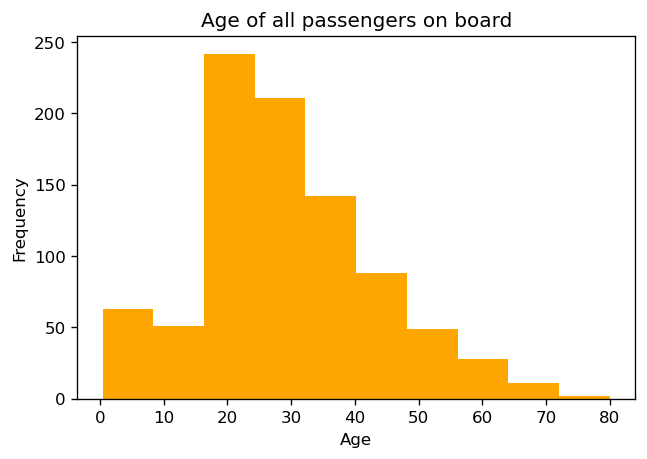

In [185]:
#Visualizing age of all passegeners
plt.hist(df.Age,color='orange')
print("Mean age of all passengers on board",df.Age.mean())
print("Standard Deviation of age of passengers",df.Age.std())
print("Max age of passnger on board ",df.Age.max())
print("Min age of passnger on board",df.Age.min())
print("Age corresponding most number of passengers",df.Age.mode())
print("Median age of all passengers",df.Age.median())
#print(df.describe())

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age of all passengers on board")
plt.show()

Mean age of all passengers that survived 28.408391812865496
Standard Deviation of age of survived 14.427863277530859
Max age of passnger that survived 80.0
Min age of passnger that survived 0.42
Age corresponding most number of surviving passengers 0    24.0
dtype: float64
Median age of surviving passengers 28.0


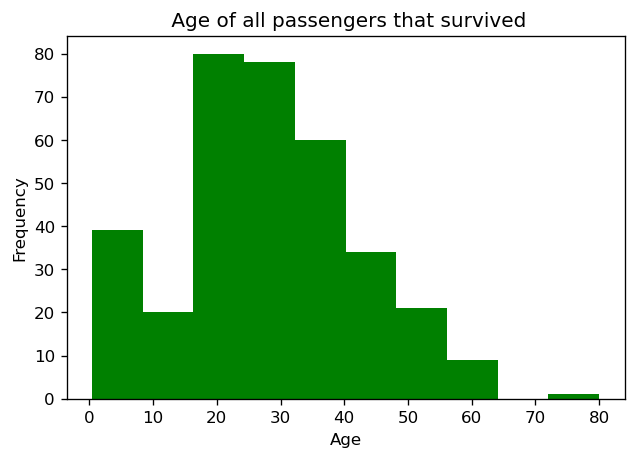

In [186]:
#Visualising age of passegers that did survive

survive=df[df["Survived"]==1]
survive.head()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title(" Age of all passengers that survived")
plt.hist(survive.Age,color="green")
print("Mean age of all passengers that survived",survive.Age.mean())
print("Standard Deviation of age of survived",survive.Age.std())
print("Max age of passnger that survived",survive.Age.max())
print("Min age of passnger that survived",survive.Age.min())
print("Age corresponding most number of surviving passengers",survive.Age.mode())
print("Median age of surviving passengers",survive.Age.median())



#print(survive.describe())

plt.show()


male      573
female    314
Name: Sex, dtype: int64


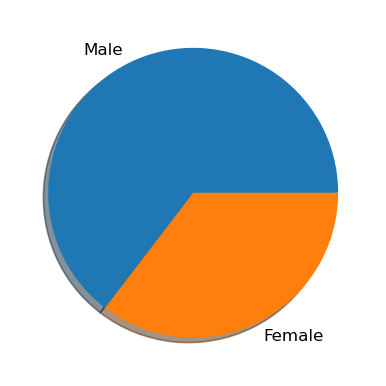

In [187]:
#Males and Females on board

gender_count=df['Sex'].value_counts()
print(gender_count)

fig, ax = plt.subplots()
l=["Male","Female"]
ax.pie(gender_count,labels=l,shadow=True)
plt.show()

female    233
male      109
Name: Sex, dtype: int64


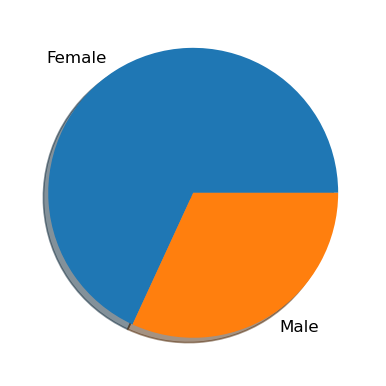

In [188]:
#Males and Females that survived

gender_survive=survive['Sex'].value_counts()
print(gender_survive)

figure, axis = plt.subplots()
l_s=["Female","Male"]#change of order as female surviors are moe check print statement
axis.pie(gender_survive,labels=l_s,shadow=True)
plt.show()


Percentage of female that survived 74.20382165605095
Percentage of males that survived 19.022687609075042


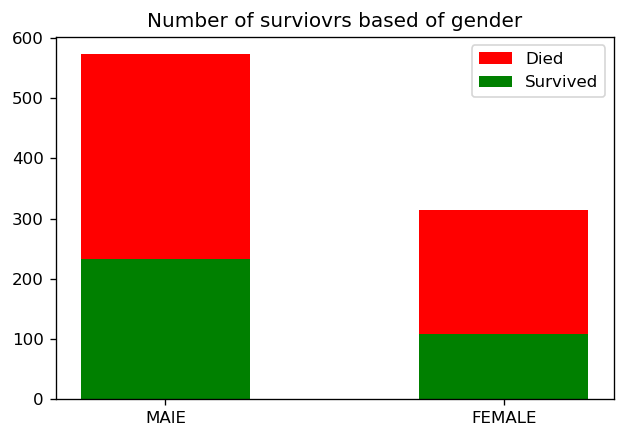

In [189]:
#Percentage of male and female that survived
print("Percentage of female that survived",(gender_survive[0]/gender_count[1])*100)
print("Percentage of males that survived",(gender_survive[1]/gender_count[0])*100)
labels=["MAlE","FEMALE"]

fig, ax=plt.subplots()
ax.bar(labels,gender_count,0.5,color="red")
ax.bar(labels,gender_survive,0.5,color='green' )
plt.title("Number of surviovrs based of gender")
plt.legend(["Died","Survived"])

plt.show()

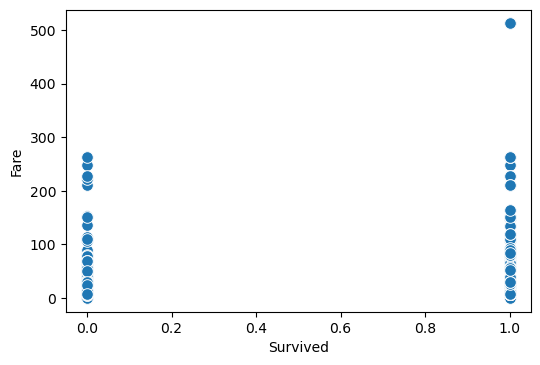

In [190]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100


sns.scatterplot(data=df,x="Survived",y="Fare",s=70)
plt.show()



/Users/namantejaswi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/namantejaswi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


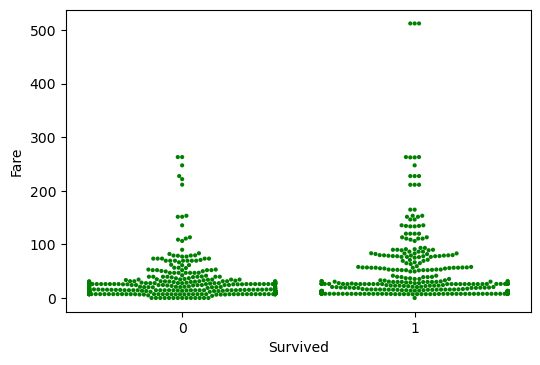

In [191]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

sns.swarmplot(x="Survived", y="Fare", data=df,color='green',s=3)
plt.show()


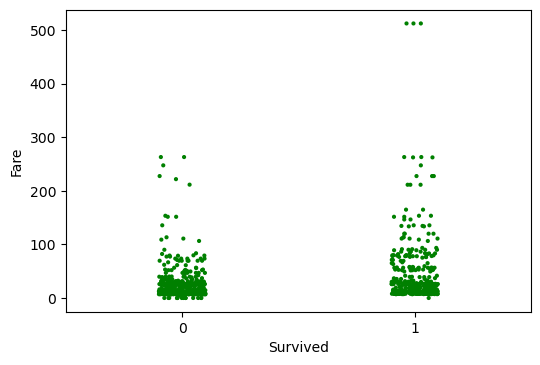

In [192]:
sns.stripplot(x="Survived", y="Fare", data=df,color='green',s=3)


plt.show()

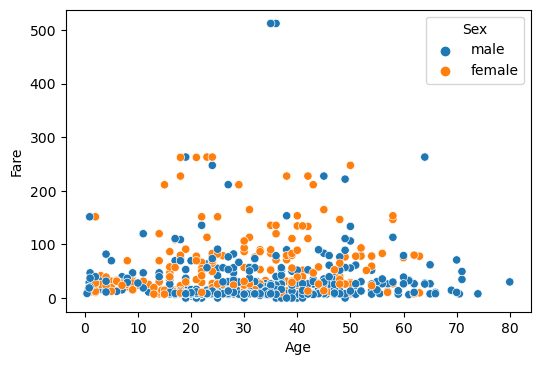

In [193]:
#How much people spend vs age 

xdata=df["Age"]
ydata=df["Fare"]

sns.scatterplot(x=xdata,y=ydata,hue=df["Sex"])
plt.show()




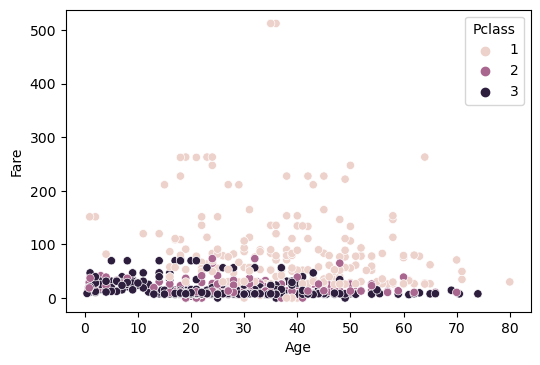

In [194]:
sns.scatterplot(x=xdata,y=ydata,hue=df["Pclass"])
plt.show()



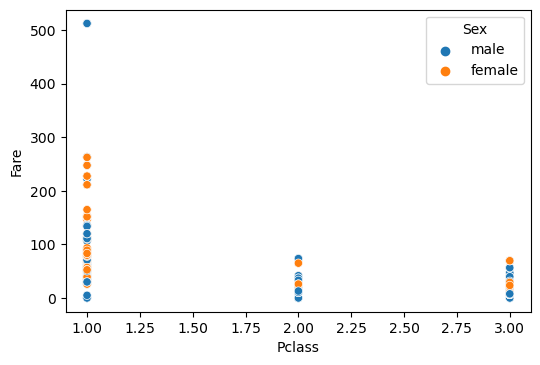

In [195]:
ydata=df["Fare"]
xdata=df["Pclass"]
sns.scatterplot(x=xdata,y=ydata,hue=df["Sex"])
plt.show()



#Assignment CheckPoint 1 Questions 

1. From df.shape we can tell that the data has 887 entiries and 7 variables

2. The data included are the the wether the passengers suvived or not, the class they travelled on,
   their name, their sex, Age, the number of siblings and spouse they had on board, the number of parents
   and children they had on board and the Fare they paid.
   
3. df.isnull().values.any() tells us that no values are missing

4. df.describe() gives us the main statistics about the dataset

5.  There are a few interesting patterns, the percentage of women that survived is stageringly larger than
    the percentage of men that survived, this is probably due to women and children being evacuated first 
    and men being selfless. 
    Also we can see that the fare for class 1 is significantly higher than class 2 and class 3 however there
    is not much difference in between the fare of class 2 and class 3
    A group of people who paid the highest fare were able to survive.


In [196]:
from sklearn.linear_model import LogisticRegression

y_train = df.Survived.iloc[0:]
x_train = df.Age.iloc[0:]



**Part 2**
**Machine Learning**

In [197]:

import sklearn


df['Sex']=np.where(df['Sex']=='female',0,1)

#0 if condition is true i.e Sex=female else male

In [198]:
# Choosing features and target in your dataset

df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


**We choose survived as our target variable with Passenger class, sex, age, fare, wether or they had siblings/spouses on board and if they had parents or children aboard.**

One first thought, it seemed useful to combine siblings/spouses on board with parents/children but it
is quite likely that during the disaster parents (presumablly older than the median and average) and chidren (ovbiviously younger) are likely to demand more assistance and may in turn have an impact with on survival rate of themselves in contrast to people without any dependents.


**Target variable: Survived**[Binary outcome 0-1]


**We first Normalize our data that is represent it between 0 and 1**


In [199]:
from sklearn import preprocessing
scaling = preprocessing.MinMaxScaler()
scaled_age_fare=scaling.fit_transform(df[["Age","Fare"]])   #Need to pass 2 d array 
print(scaled_age_fare)
df[["Age","Fare"]]=scaled_age_fare

[[0.27117366 0.01415106]
 [0.4722292  0.13913574]
 [0.32143755 0.01546857]
 ...
 [0.08268409 0.04577135]
 [0.32143755 0.0585561 ]
 [0.39683338 0.01512699]]


In [200]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,0.271174,1,0,0.014151
1,1,1,0,0.472229,1,0,0.139136
2,1,3,0,0.321438,0,0,0.015469
3,1,1,0,0.434531,1,0,0.103644
4,0,3,1,0.434531,0,0,0.015713


**Spliing between training and testing dataset**


In [201]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=0)

#Random state is nothing but a seed to repeat the randomly selected values
#The state variable is used for initializing the internal random number

print(training_data.shape)
print(testing_data.shape)

(709, 7)
(178, 7)


In [202]:
print(testing_data["Survived"])

14     0
158    0
762    0
740    1
482    0
      ..
834    1
672    0
181    0
631    0
140    1
Name: Survived, Length: 178, dtype: int64


**Modelling**


In [203]:
x_train_input=training_data[['Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
#x_train_input.head()


In [204]:
x_test_input=testing_data[['Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
#x_test_input.head()

In [205]:
y_train_output=training_data[['Survived']]
#y_train_output.head()


In [206]:
y_test_output=testing_data[['Survived']]
#y_test_output.head()


In [207]:
#error
#A column-vector y was passed when a 1d array was expected.
#Please change the shape of y to (n_samples,), for example using ravel().

**KNN**

K Nearest Neighbour is a supervised machine learning algorithm
which is widely used for classification be it binary or multi class.

We first specify k, which is the number of samples our model look s
for to assign to a category, the samples are assigned to a category or
a group based on the eucledian distance between the groups. 

A popular initial value for k is to take sqrt(n) where n is the number of samples 



In [208]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_input,y_train_output.values.ravel())

y_predict_knn=knn.predict(x_test_input)



In [209]:
print(y_predict_knn)


[1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1]


In [210]:
print(y_test_output.values.ravel())

[0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]


In [211]:
xx=np.arange(1,179)

#sns.scatterplot(x=xx,y=y_predict)

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test_output,y_predict_knn))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       117
           1       0.72      0.67      0.69        61

    accuracy                           0.80       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.80      0.80      0.80       178



In [213]:
cf_m_knn=sklearn.metrics.confusion_matrix(y_test_output, y_predict_knn)
print(cf_m_knn)

[[101  16]
 [ 20  41]]


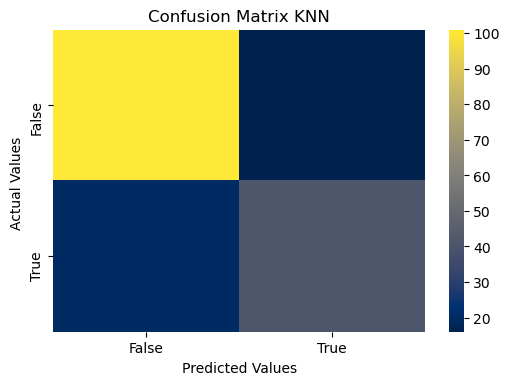

In [214]:
ax=sns.heatmap(cf_m_knn,cmap="cividis")
ax.set_title("Confusion Matrix KNN")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [215]:

TN = cf_m_knn[0][0]
FN = cf_m_knn[1][0]
TP = cf_m_knn[1][1]
FP = cf_m_knn[0][1]

print("Number of True positivies ", TP)
print("Number of True negatives ",TN)
print("Number of False positives",FP)
print("Number of False Negatives",FN)

Number of True positivies  41
Number of True negatives  101
Number of False positives 16
Number of False Negatives 20


In [216]:
Accuracy_knn= (TP+TN)/(TP+TN+FP+FN)
print("Accuracy is",Accuracy_knn*100,"%")

# Precision is how many of those labelled true were actually true
Precision_knn=TP/(TP+FP)
print("Precision is",Precision_knn*100,"%")

#How many true were selected(Recalled)
Recall_knn=TP/(TP+FN)
print("Recall is",Recall_knn*100,"%")

F1_Score_knn = 2*(Recall_knn * Precision_knn) / (Recall_knn + Precision_knn)
print("F1 Score is",F1_Score_knn)



Accuracy is 79.7752808988764 %
Precision is 71.9298245614035 %
Recall is 67.21311475409836 %
F1 Score is 0.6949152542372881


**Random Forest**

Random forest is a bagging technique which uses multiple decision trees as bags 

A Brief about Random Forest Random forest is an ensembling technique. 
What then are an ensembling techniques? 
Ensembling involves creating multiple models, in our case decision tress and then combining them. 
Random forest can be thought as combining multiple decision tress, that is we have multiple questions 
so that we can define our boundary, or classification based on the answers to those question 
Other Ensembling Techniques- Bagging, Bootstrapping, Stacking

In [217]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

randforest=RandomForestClassifier(n_estimators=100)

randforest.fit(x_train_input,y_train_output.values.ravel())

y_predict_randforest = randforest.predict(x_test_input)

print(y_predict_randforest)

[1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1]


In [218]:
print(classification_report(y_test_output,y_predict_randforest))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.72      0.74        61

    accuracy                           0.83       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.83      0.82       178



In [219]:
cf_m_rf=sklearn.metrics.confusion_matrix(y_test_output, y_predict_randforest)
print(cf_m_rf)



[[103  14]
 [ 17  44]]


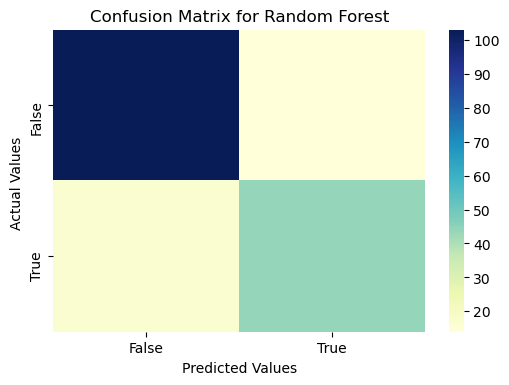

In [220]:
ax=sns.heatmap(cf_m_rf,cmap="YlGnBu")
ax.set_title("Confusion Matrix for Random Forest")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [221]:

TN = cf_m_rf[0][0]
FN = cf_m_rf[1][0]
TP = cf_m_rf[1][1]
FP = cf_m_rf[0][1]

print("Number of True positivies ", TP)
print("Number of True negatives ",TN)
print("Number of False positives",FP)
print("Number of False Negatives",FN)

Number of True positivies  44
Number of True negatives  103
Number of False positives 14
Number of False Negatives 17


In [222]:
Accuracy_rf= (TP+TN)/(TP+TN+FP+FN)
print("Accuracy is",Accuracy_rf*100,"%")

# Precision is how many of those labelled true were actually true
Precision_rf=TP/(TP+FP)
print("Precision is",Precision_rf*100,"%")

#How many true were selected(Recalled)
Recall_rf=TP/(TP+FN)
print("Recall is",Recall_rf*100,"%")

F1_Score_rf = 2*(Recall_rf * Precision_rf) / (Recall_rf + Precision_rf)
print("F1 Score is",F1_Score_rf)


Accuracy is 82.58426966292134 %
Precision is 75.86206896551724 %
Recall is 72.1311475409836 %
F1 Score is 0.7394957983193277


Logistic regression

Logistic regression uses sigmoid activation functiob which maps the input to an output in betwwen 0 and 1

Sigmoid(x)=e^x/(e^x+1)

sigmoid is extensively used for binary classification
Given that sigmoid outputs in between 0 and 1 we can choose a threshold to
convert them into zero or one, here we choose 0.5 as a threshold.

We can have different threshold based on the nature of our problem and depending
on wether we want high precision or high recall.

Sigmoid is generally not preffered for deep nueral network layers
as it suffers from the problem of vanishing gradient in such cases we are better off with relu

In [223]:
#Logistic Regression

import sklearn.linear_model

logistic_reg=sklearn.linear_model.LogisticRegression()
logistic_reg.fit(x_train_input,y_train_output.values.ravel())

y_predict_logistic_reg=logistic_reg.predict(x_test_input)

print(y_predict_logistic_reg)

[1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1]


In [224]:
print(classification_report(y_test_output,y_predict_logistic_reg))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       117
           1       0.68      0.64      0.66        61

    accuracy                           0.78       178
   macro avg       0.75      0.74      0.75       178
weighted avg       0.77      0.78      0.77       178



In [225]:
#Plotting the confusion Matrix

cf_m_lrg=sklearn.metrics.confusion_matrix(y_test_output, y_predict_logistic_reg, labels=None)
print(cf_m_lrg)

[[99 18]
 [22 39]]


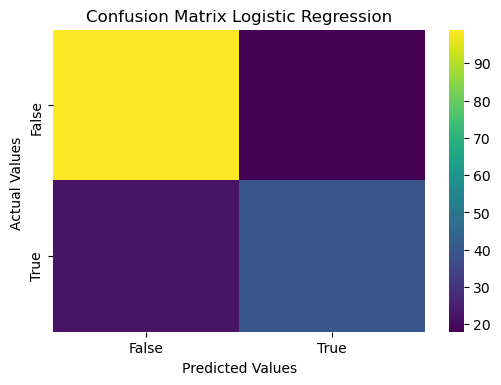

In [226]:
ax=sns.heatmap(cf_m_lrg,cmap="viridis")
ax.set_title("Confusion Matrix Logistic Regression")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [227]:

TN = cf_m_lrg[0][0]
FN = cf_m_lrg[1][0]
TP = cf_m_lrg[1][1]
FP = cf_m_lrg[0][1]

print("Number of True positivies ", TP)
print("Number of True negatives ",TN)
print("Number of False positives",FP)
print("Number of False Negatives",FN)

Number of True positivies  39
Number of True negatives  99
Number of False positives 18
Number of False Negatives 22


In [228]:
Accuracy_lrg= (TP+TN)/(TP+TN+FP+FN)
print("Accuracy is",Accuracy_lrg*100,"%")

Accuracy is 77.52808988764045 %


In [229]:
# Precision is how many of those labelled true were actually true
Precision_lrg=TP/(TP+FP)
print("Precision is",Precision_lrg*100,"%")

Precision is 68.42105263157895 %


In [230]:
#How many true were selected(Recalled)
Recall_lrg=TP/(TP+FN)
print("Recall is",Recall_lrg*100,"%")

Recall is 63.934426229508205 %


In [231]:
F1_Score_lrg = 2*(Recall_lrg * Precision_lrg) / (Recall_lrg + Precision_lrg)
print("F1 Score is",F1_Score_lrg)

F1 Score is 0.6610169491525425


**Comparing our Results**

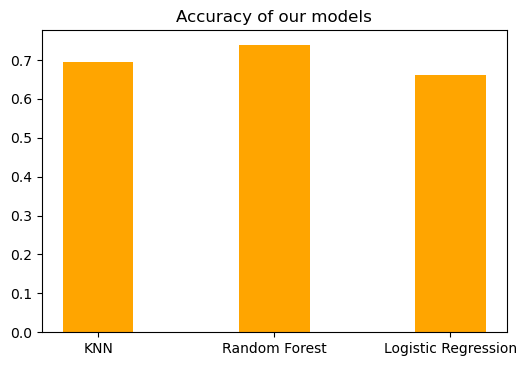

In [232]:

plt.bar(["KNN","Random Forest","Logistic Regression"],[F1_Score_knn,F1_Score_rf,F1_Score_lrg],color="orange",width=0.4)
plt.title("Accuracy of our models")
plt.show()

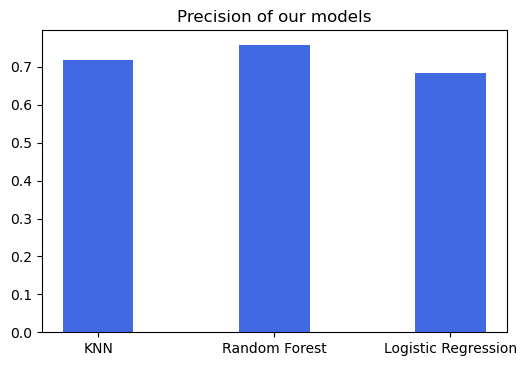

In [233]:
plt.bar(["KNN","Random Forest","Logistic Regression"],[Precision_knn,Precision_rf,Precision_lrg],color="royalblue",width=0.4)
plt.title("Precision of our models")
plt.show()

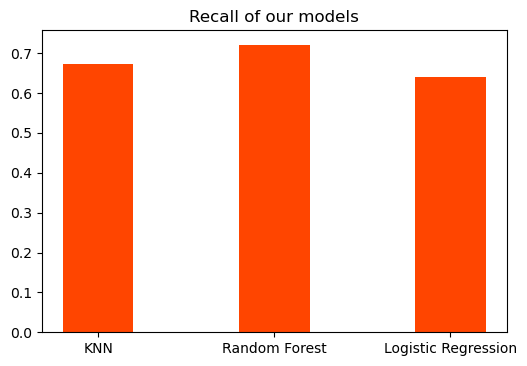

In [234]:
plt.bar(["KNN","Random Forest","Logistic Regression"],[Recall_knn,Recall_rf,Recall_lrg],color="orangered",width=0.4)
plt.title("Recall of our models")
plt.show()

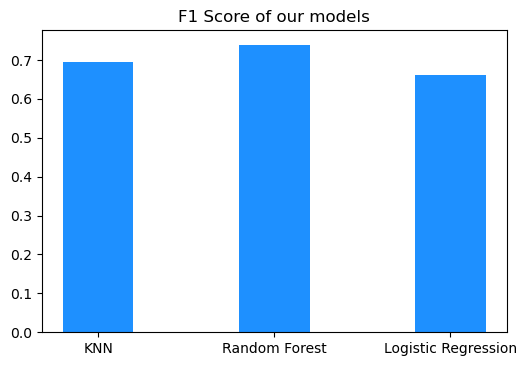

In [235]:
#F1socre=2*((precision*recall)/(precision+recall)).
plt.bar(["KNN","Random Forest","Logistic Regression"],[F1_Score_knn,F1_Score_rf,F1_Score_lrg],color="dodgerblue",width=0.4)
plt.title("F1 Score of our models")
plt.show()



**Part 3 Deep Learning**



In [236]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [237]:
x_train_input.head()


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
363,3,1,0.371701,0,0,0.014151
255,1,0,0.472229,0,0,0.154588
476,3,0,0.019854,0,1,0.023984
271,1,1,0.459663,0,1,0.057971
553,1,0,0.597889,1,0,0.077294


In [238]:
model = Sequential()
#We have sequential model for instance we can have a reccurent model as well


model.add(Dense(32,input_dim = 6, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))


#Final output layer will have only one neuron corresponding to survived 0 or 1


model.add(Dense(1,activation = 'sigmoid'))


model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                224       
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 4)                 36        
                                                                 
 dense_48 (Dense)            (None, 1)                 5         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


  **Layer 1 = Input Layer **  \
    **Number of parameters in layer 2 = 32*6(weights)+32(bias) = 224** \
    **Number of parameters in layer 3 = 32*16(Weights)+16(bias) = 528** \
    **Number of parameters in layer 4 = 16*(Weights) + 8(bias) = 136** \
    **Number of parameters in layer 5 = 8*4(Weights)+ 4(bias) = 36** \
    **Number of parameters in layer 6 = 4*1(Weights) + 1(bias) = 5** 

In [239]:
model.compile(loss = "binary_crossentropy", optimizer='rmsprop',metrics = ['accuracy','mse'])

**Since we have relatively small dataset it is alright if we dont use batches** \
**Although our learning may be more biased as we are modifying our hypithesis based of 1 input at a time**

In [240]:
training=model.fit(x = x_train_input, y = y_train_output, epochs =20)

Epoch 1/20
23/23 [==============================] - 1s 2ms/step - loss: 0.6615 - accuracy: 0.6037 - mse: 0.2343
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6037 - mse: 0.2138
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.6037 - mse: 0.2005
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.6037 - mse: 0.1913
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7546 - mse: 0.1853
Epoch 6/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.7729 - mse: 0.1823
Epoch 7/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7856 - mse: 0.1801
Epoch 8/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.8011 - mse: 0.1784
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7969 - mse:

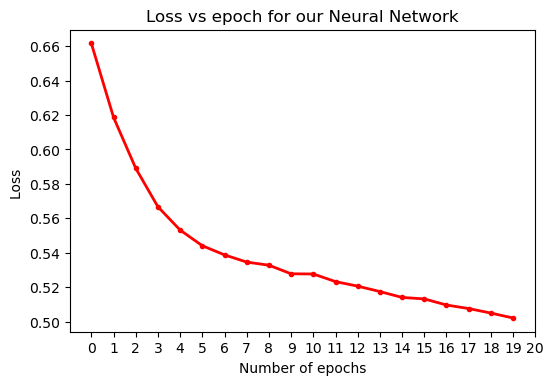

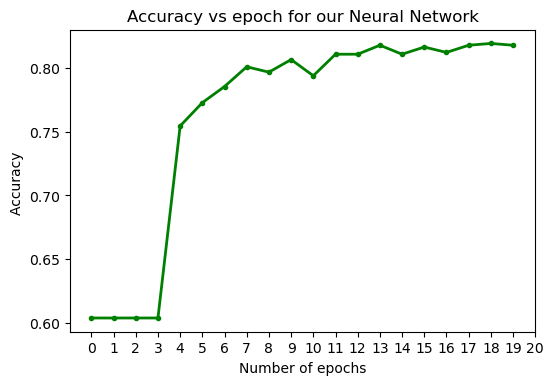

In [241]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(training.history["loss"],color='r',marker=".",linewidth=2)
plt.title("Loss vs epoch for our Neural Network")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Loss ")

plt.show()


plt.plot(training.history["accuracy"],color='g',marker=".",linewidth=2)
plt.title("Accuracy vs epoch for our Neural Network")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Accuracy ")

plt.show()



In [242]:
y_predict_neural_net=model.predict(x_test_input)

In [243]:
print(y_predict_neural_net)
#Here we have the probability of survival or confidence so we can choose a threshold of 0.5

[[0.566374  ]
 [0.03015056]
 [0.2396057 ]
 [0.10248464]
 [0.3584265 ]
 [0.24521536]
 [0.26909167]
 [0.25340825]
 [0.23928839]
 [0.16390863]
 [0.566374  ]
 [0.566374  ]
 [0.1137962 ]
 [0.35254955]
 [0.11440694]
 [0.10976261]
 [0.566374  ]
 [0.10160428]
 [0.20556393]
 [0.36482805]
 [0.05590656]
 [0.11491439]
 [0.11724919]
 [0.24110547]
 [0.2614752 ]
 [0.566374  ]
 [0.35254675]
 [0.566374  ]
 [0.10883543]
 [0.11168954]
 [0.42968756]
 [0.56273973]
 [0.566374  ]
 [0.566374  ]
 [0.21030888]
 [0.566374  ]
 [0.20033833]
 [0.10427588]
 [0.09400049]
 [0.21027601]
 [0.11614442]
 [0.11494151]
 [0.3198147 ]
 [0.10699663]
 [0.11605969]
 [0.11496708]
 [0.566374  ]
 [0.10516927]
 [0.16960639]
 [0.55690855]
 [0.1137962 ]
 [0.10929328]
 [0.08220041]
 [0.51839435]
 [0.09169227]
 [0.142804  ]
 [0.51481926]
 [0.09563699]
 [0.55772084]
 [0.10334885]
 [0.566374  ]
 [0.10424432]
 [0.08494788]
 [0.15250134]
 [0.11369053]
 [0.3780923 ]
 [0.10608026]
 [0.566374  ]
 [0.11167905]
 [0.566374  ]
 [0.30735683]
 [0.20

In [244]:
#Converting probabilities to binary output
for i in range(len(y_predict_neural_net)):
    if  y_predict_neural_net[i]<0.5:
        y_predict_neural_net[i]=0
    else:
         y_predict_neural_net[i]=1


In [245]:
print(y_predict_neural_net)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.

In [246]:
print(y_predict_neural_net.shape)

(178, 1)


In [247]:
#y_predict_knn.reshape(178,) no need

In [248]:
cf_m_nn=sklearn.metrics.confusion_matrix(y_test_output, y_predict_neural_net, labels=None)

print(cf_m_nn)

[[101  16]
 [ 25  36]]


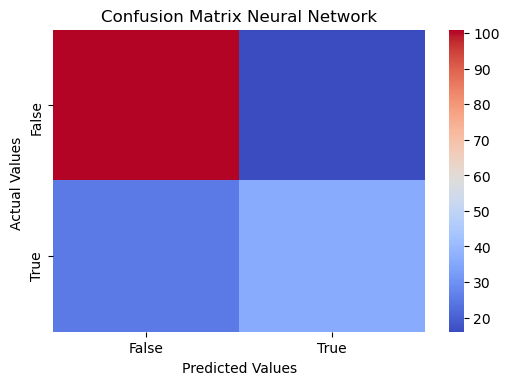

In [249]:
ax=sns.heatmap(cf_m_nn,cmap="coolwarm")
ax.set_title("Confusion Matrix Neural Network")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [250]:
TN = cf_m_nn[0][0]
FN = cf_m_nn[1][0]
TP = cf_m_nn[1][1]
FP = cf_m_nn[0][1]

print("Number of True positivies ", TP)
print("Number of True negatives ",TN)
print("Number of False positives",FP)
print("Number of False Negatives",FN)

Number of True positivies  36
Number of True negatives  101
Number of False positives 16
Number of False Negatives 25


In [251]:
Accuracy= (TP+TN)/(TP+TN+FP+FN)
print("Accuracy is",Accuracy*100,"%")
Precision=TP/(TP+FP)
print("Precision is",Precision*100,"%")
Recall=TP/(TP+FN)
print("Recall is",Recall*100,"%")
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1 Score is",F1_Score)

Accuracy is 76.96629213483146 %
Precision is 69.23076923076923 %
Recall is 59.01639344262295 %
F1 Score is 0.6371681415929203


**Our training accuracy was 80% so an accuracy of 78 on test data set is great and \
it means our model has low variance and generalizes well**

**Hyperparameter Testing and Tunning**

In [252]:
#using a sparse neural network with less number of parameters
#Using exponential linear unit as activation instead of relu

model_l = Sequential()
model_l.add(Dense(8,input_dim = 6, activation = 'elu'))
model_l.add(Dense(4, activation = 'elu'))
model_l.add(Dense(1,activation = 'sigmoid'))

model_l.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 8)                 56        
                                                                 
 dense_50 (Dense)            (None, 4)                 36        
                                                                 
 dense_51 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [253]:

model_l.compile(loss = "binary_crossentropy", optimizer='rmsprop',metrics = ['accuracy','mse'])

In [254]:
training_less_layer=model_l.fit(x = x_train_input, y = y_train_output, epochs =20)

Epoch 1/20
23/23 [==============================] - 1s 2ms/step - loss: 0.7166 - accuracy: 0.5205 - mse: 0.2609
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6389 - mse: 0.2353
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6403 - mse: 0.2238
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6587 - mse: 0.2165
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6615 - mse: 0.2105
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.6685 - mse: 0.2051
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.6770 - mse: 0.2004
Epoch 8/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.6841 - mse: 0.1956
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.6925 - mse:

In [255]:
print(x_train_input.shape)


(709, 6)


**We can see that our model's accuraccy decreases by less than 4 % \
  despite redcuing so many nuerons in our dense layers and consequently \
  reducing the number of parameters to 97 from 929, almost by scale of 10 *** 

**This a point of important attention as we must realize that \
Deeper Neural Network with more number of layers and parameters does not \
always mean that our model will perform better if anything it may \
overfit and cost us time given the scale of modern Neural Nets**

In [256]:
#Using adagrad instead of rms prop as our optimizer and elu

m = Sequential()
m.add(Dense(8,input_dim = 6, activation = 'elu'))
m.add(Dense(4, activation = 'elu'))
m.add(Dense(1,activation = 'sigmoid'))

m.summary()

m.compile(loss = "binary_crossentropy", optimizer='adagrad',metrics = ['accuracy','mse'])
adgrad_training=m.fit(x = x_train_input, y = y_train_output, epochs =20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 56        
                                                                 
 dense_53 (Dense)            (None, 4)                 36        
                                                                 
 dense_54 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.3399 - mse: 0.2682
Epoch 2/20
23/23 [==============================] - 0s 1ms/step - loss: 0.7185 - accuracy: 0.3554 - mse: 0.2621
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.5021

In [257]:

mod = Sequential()
mod.add(Dense(8,input_dim = 6, activation = 'elu'))
mod.add(Dense(4, activation = 'elu'))
mod.add(Dense(1,activation = 'sigmoid'))

mod.summary()

mod.compile(loss = "binary_crossentropy", optimizer='rmsprop',metrics = ['accuracy','mse'])
rms_training=mod.fit(x = x_train_input, y = y_train_output, epochs =20)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 8)                 56        
                                                                 
 dense_56 (Dense)            (None, 4)                 36        
                                                                 
 dense_57 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 1s 1ms/step - loss: 0.7020 - accuracy: 0.3441 - mse: 0.2544
Epoch 2/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5938 - mse: 0.2471
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6107

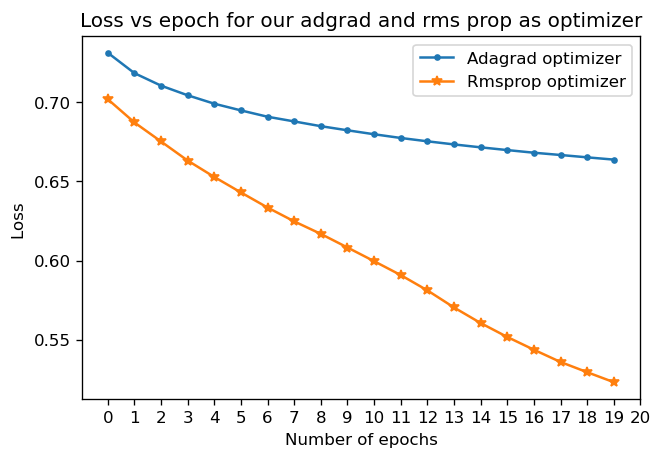

In [258]:

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120


#plt.plot(adgrad_training.history["loss"],color='r',marker=".",linewidth=2)
adg=adgrad_training.history["loss"]
rms=rms_training.history["loss"]
plt.plot(adg,marker='.')
plt.plot(rms,marker='*')
plt.title("Loss vs epoch for our adgrad and rms prop as optimizer")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Loss ")
plt.legend(["Adagrad optimizer","Rmsprop optimizer"])

plt.show()

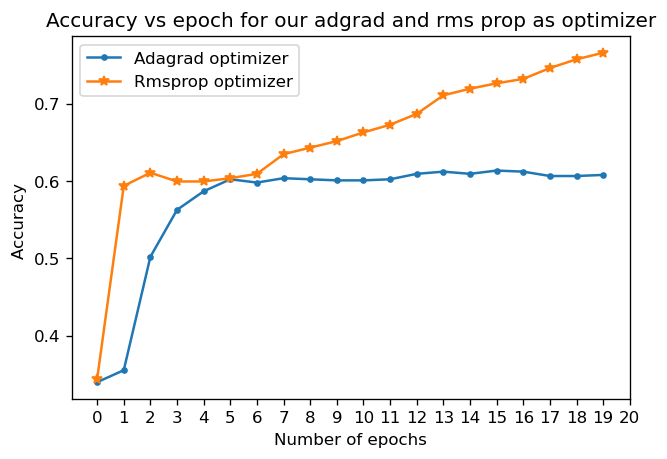

In [259]:
adg_a=adgrad_training.history["accuracy"]
rms_a=rms_training.history["accuracy"]
plt.plot(adg_a,marker='.')
plt.plot(rms_a,marker='*')
plt.title("Accuracy vs epoch for our adgrad and rms prop as optimizer")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Accuracy ")
plt.legend(["Adagrad optimizer","Rmsprop optimizer"])

plt.show()

**From the above graphs we can concur that rmsprop is significantly faster than adagrad \
  This is of important note as once again for training deeper model with millions of parameter\
    we can save significant time and computing resource**


In [260]:
## Using only sigmoid activation function even in dense layer
#This means for each neuron the forwad feed will essentially be binary


mod_sig = Sequential()
mod_sig.add(Dense(8,input_dim = 6, activation = 'sigmoid'))
mod_sig.add(Dense(4, activation = 'sigmoid'))
mod_sig.add(Dense(1,activation = 'sigmoid'))

mod_sig.summary()

mod_sig.compile(loss = "binary_crossentropy", optimizer='rmsprop',metrics = ['accuracy','mse'])
only_sig=mod_sig.fit(x = x_train_input, y = y_train_output, epochs = 20)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 8)                 56        
                                                                 
 dense_59 (Dense)            (None, 4)                 36        
                                                                 
 dense_60 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4330 - mse: 0.2521
Epoch 2/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.6417 - mse: 0.2456
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6065

**We see that the performance of our model drops of significantlly if we use only sigmoid activation \
Thus we often need to find a balance between sophistication of our model and its  \
Earlier using so many layers did not help the performance of our model but using only sigmoid \
as our activation is too naive and is bound to yield a negative performance \
In addition sigmoid has to deal with the problem of vanishing gradients which \
makes backprop and weight updation very difficult to a point where the model does not learn anything.**

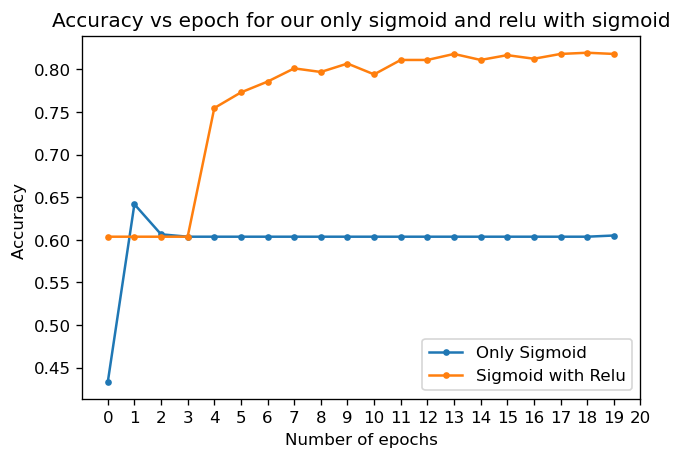

In [261]:
sig_only=only_sig.history["accuracy"]
nn_orignal=training.history["accuracy"]
plt.plot(sig_only,marker='.')
plt.plot(nn_orignal,marker='.')
plt.title("Accuracy vs epoch for our only sigmoid and relu with sigmoid")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Accuracy ")
plt.legend(["Only Sigmoid","Sigmoid with Relu"])

plt.show()

In [262]:
#Lastly we try to use mini batch with our orignal deep neural net to 

model_mini = Sequential()

model_mini.add(Dense(32,input_dim = 6, activation = 'relu'))
model_mini.add(Dense(16, activation = 'relu'))
model_mini.add(Dense(8, activation = 'relu'))
model_mini.add(Dense(4, activation = 'relu'))
model_mini.add(Dense(1,activation = 'sigmoid'))

#model.summary()

model_mini.compile(loss = "binary_crossentropy", optimizer='rmsprop',metrics = ['accuracy','mse'])
training_mini=model_mini.fit(x = x_train_input, y = y_train_output, epochs =20,batch_size = 16)



Epoch 1/20
45/45 [==============================] - 1s 1ms/step - loss: 0.6903 - accuracy: 0.5092 - mse: 0.2486
Epoch 2/20
45/45 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6333 - mse: 0.2284
Epoch 3/20
45/45 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.7123 - mse: 0.2082
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7786 - mse: 0.1824
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7941 - mse: 0.1650
Epoch 6/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7983 - mse: 0.1564
Epoch 7/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7997 - mse: 0.1507
Epoch 8/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8054 - mse: 0.1481
Epoch 9/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8068 - mse:

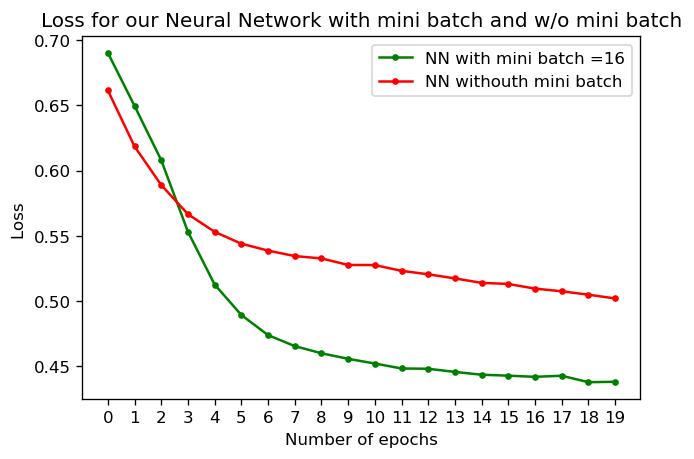

In [263]:
plt.plot(training_mini.history["loss"],color='g',marker=".")
plt.title("Loss for our Neural Network with mini batch and w/o mini batch")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Loss ")
plt.plot(training.history["loss"],color='r',marker='.')
plt.legend(["NN with mini batch =16","NN withouth mini batch"])
plt.show()

**We can see that using mini batch helps us reduce our loss at a faster rate \
  so it is useful to try to implement mini batch before we increase our learning rate \
  if we are trying to speed up our training as we know the downsides of increasing learning rate too much.**

**Summary of our Models**

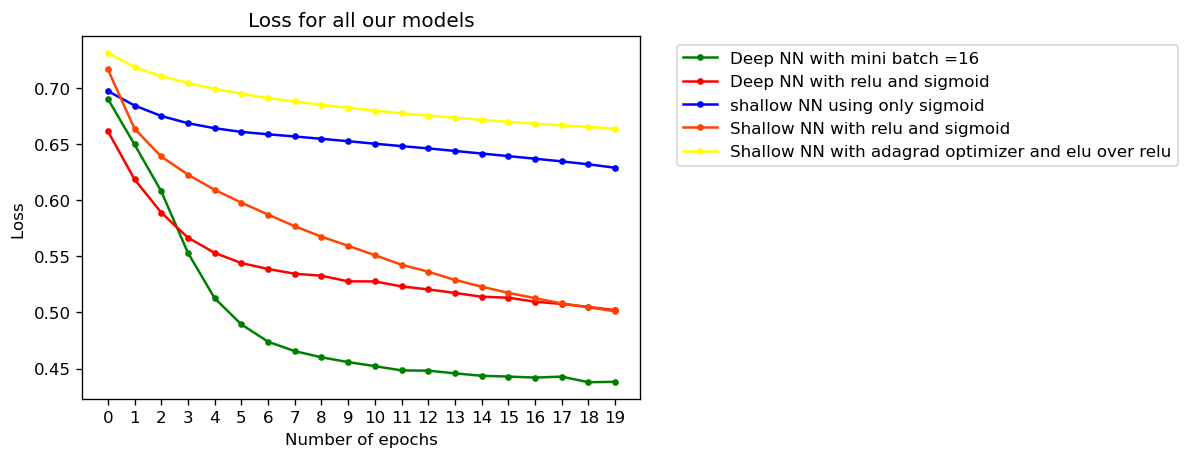

In [264]:
plt.title("Loss for all our models")
plt.xlabel("Number of epochs")
plt.xticks(range(0,21,1))
plt.ylabel("Loss ")
plt.plot(training_mini.history["loss"],color='g',marker=".",label='Deep NN with mini batch =16')
plt.plot(training.history["loss"],color='r',marker='.',label="Deep NN with relu and sigmoid")
plt.plot(only_sig.history["loss"],marker='.',label="shallow NN using only sigmoid",color='blue')
plt.plot(training_less_layer.history["loss"],color='orangered',label="Shallow NN with relu and sigmoid",marker=".")
plt.plot(adg,marker='.',label="Shallow NN with adagrad optimizer and elu over relu",color='yellow')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


**Thank you for seeing my work !**

References

https://keras.io/getting_started/intro_to_keras_for_engineers/
https://scikit-learn.org/stable/modules/classes.html
https://www.tensorflow.org/api_docs/python/tf/keras/Model
https://www.tensorflow.org/api_docs/python/tf/nn
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
https://seaborn.pydata.org/